# importing library

In [3]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'sklearn'

In [2]:
df1 = pd.read_csv(r"adult.csv") #reading the file

NameError: name 'pd' is not defined

In [ ]:
df1

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df1.columns # column in the data frame 

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [ ]:
df1.dtypes # columns data types 

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
country           object
salary            object
dtype: object

In [ ]:
# get all the categorical columns name
#cat_cols = list(df1.select_dtypes(include='object').columns)
#print(f'Categorical columns: {cat_cols}')

Categorical columns: ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'country', 'salary']


In [ ]:
# get all the continuous columns name
#num_cols = list(df1.select_dtypes(exclude='object').columns)
#print(f'Continuous columns: {num_cols}')

# filter categorical data and numerical data

In [ ]:
# filter categorical data and numerical data
# categorical_columns =df[[cat_col_1,cat_col_2,cat_col_3,cat_col_4]].copy() # diffrent way of writing 

# all categorical data we need to first encode them 

numerics= ['int8' , 'int16' , 'int32' , 'int64' , 'float16' , 'float32' , 'float64'] 

categorical_col=[]   
    
features = df1.columns.values.tolist()   
for col in features:
    if df1[col].dtype in numerics:  
    
        continue
        
    categorical_col.append(col) 

In [ ]:
categorical_columns=df1[categorical_col].copy()

In [ ]:
categorical_col # List of categorical_columns in the data frame 

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

# Encoding the target varible 

In [ ]:
categorical_columns['salary']=categorical_columns['salary'].replace(' <=50K', 0)
categorical_columns['salary']=categorical_columns['salary'].replace(' >50K', 1)

In [ ]:
categorical_columns

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,0
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,0
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,0
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,0
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,0
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,1
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,0
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,0


# Observation  for the catcategorical_columns

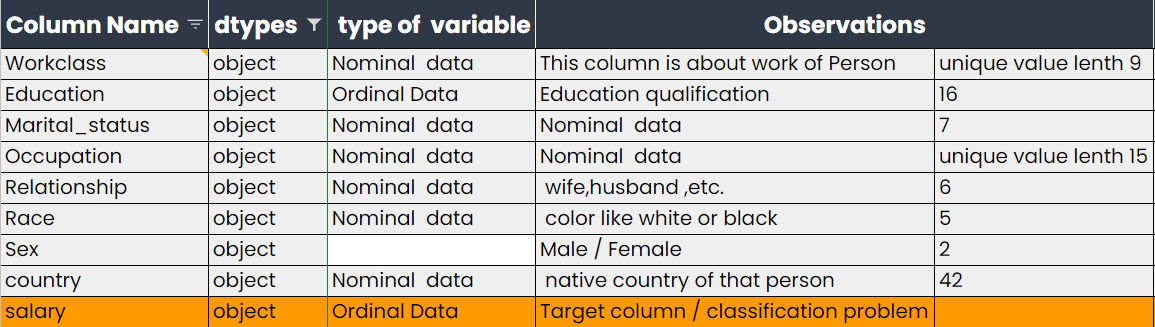

# occupation

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['occupation'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['occupation'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['occupation'].value_counts())

1)-->unique value lenth 15
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64


In [ ]:
#Here private is the highest mode
categorical_columns['occupation']=categorical_columns['occupation'].replace(' ?','Others_occupation')

# workclass

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['workclass'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['workclass'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['workclass'].value_counts())

1)-->unique value lenth 9
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [ ]:
categorical_columns['workclass']=categorical_columns['workclass'].replace(' ?',' Private')

# education

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['education'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['education'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['education'].value_counts())

1)-->unique value lenth 16
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64


In [ ]:
# Creating a bins for education column 

In [ ]:
categorical_columns['education']=categorical_columns['education'].replace([' 1st-4th',' 5th-6th',' Prof-school',' Preschool',' 7th-8th',' 9th',' 10th',' 11th',' 12th'],'school')
categorical_columns['education']=categorical_columns['education'].replace([' Assoc-acdm',' Assoc-voc'],'Associate')
categorical_columns['education']=categorical_columns['education'].replace([' Some-college'],'College')

# marital-status

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['marital-status'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['marital-status'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['marital-status'].value_counts())

1)-->unique value lenth 7
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64


# relationship

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['relationship'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['relationship'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['relationship'].value_counts())

1)-->unique value lenth 6
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64


# race

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['race'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['race'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['race'].value_counts())

1)-->unique value lenth 5
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64


# sex

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['sex'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['sex'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['sex'].value_counts())

1)-->unique value lenth 2
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' Male' ' Female']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  Male      21790
 Female    10771
Name: sex, dtype: int64


# country

In [ ]:
print ('1)-->unique value lenth',len(list((categorical_columns['country'].unique()))))
print('-'*100)
print ('2)-->This is a list of unique names',categorical_columns['country'].unique())
print('-'*100)
print ("3)-->value_counts,",categorical_columns['country'].value_counts())

1)-->unique value lenth 42
----------------------------------------------------------------------------------------------------
2)-->This is a list of unique names [' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
----------------------------------------------------------------------------------------------------
3)-->value_counts,  United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada            

In [ ]:
categorical_columns['country']=categorical_columns['country'].replace(' ?','Others_country')

## Checking the relation with target variable

In [ ]:
'''#### Assumption(H0): 
There is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)<br>

ANOVA Test result: Probability of H0 being true'''

'#### Assumption(H0): \nThere is NO relation between the given variables (i.e. The average(mean) values of the numeric Target variable is same for all the groups in the categorical Predictor variable)<br>\n\nANOVA Test result: Probability of H0 being true'

In [ ]:
'''# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, categorical_col):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in categorical_col:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors) '''

In [ ]:
'''FunctionAnova(inpData=categorical_columns, 
              TargetVariable='salary', 
              categorical_col=categorical_col)'''

"FunctionAnova(inpData=categorical_columns, \n              TargetVariable='salary', \n              categorical_col=categorical_col)"

# It is time to convert categorical_columns into  numrical value  using get_dummies encoding technique

In [ ]:

df_dummies = pd.get_dummies(categorical_columns[['workclass', 'education', 'marital-status',
                                                'occupation', 'relationship', 'race','sex' , 'country',
                                                 ] ], drop_first=True)

In [ ]:
df_dummies

,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ Doctorate,education_ HS-grad,education_ Masters,...,country_ Puerto-Rico,country_ Scotland,country_ South,country_ Taiwan,country_ Thailand,country_ Trinadad&Tobago,country_ United-States,country_ Vietnam,country_ Yugoslavia,country_Others_country
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32558,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32559,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
### 2ND FEATURE SELECTION TECHNIQUE (SELECT PERCENTILE FEATURE , CHI2)
from sklearn.feature_selection import SelectPercentile , chi2

In [ ]:
# instantiate selectpercentile an fit (feature and label)
Spercentile = SelectPercentile(score_func = chi2 , percentile = 80)
sp = Spercentile.fit(df_dummies,categorical_columns['salary']) 

In [ ]:
# seperate the feature to check the p value
cols = Spercentile.get_support(indices = True)  # this will give you index of 80% feature
print ('feature index'  , cols)

feature = df_dummies.columns[cols]              # this will give you name of that 80% feature
print('feature' , list(feature))

feature index [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 47 49 50 51
 52 54 55 57 60 61 63 64 65 67 68 69 70 71 73 74 77 80 81]
feature ['workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_Associate', 'education_College', 'education_school', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupat

In [ ]:
# lets se all the feature vs chi2 score vs pvalue
df_score = pd.DataFrame ({'feature':df_dummies.columns , 'chi2_score': Spercentile.scores_ , 'p_value': Spercentile.pvalues_})
# this will give all 100% but we have to select 80%
df_score.sort_values (by = 'chi2_score' , ascending = False)   

,feature,chi2_score,p_value
14,marital-status_ Married-civ-spouse,3477.515877,0.000000e+00
16,marital-status_ Never-married,2218.521977,0.000000e+00
35,relationship_ Own-child,1435.873016,0.000000e+00
21,occupation_ Exec-managerial,1315.482632,4.882518e-288
27,occupation_ Prof-specialty,981.835068,1.594790e-215
...,...,...,...
46,country_ Cuba,0.259531,6.104424e-01
53,country_ Greece,0.194900,6.588693e-01
62,country_ Ireland,0.138458,7.098189e-01
59,country_ Hungary,0.007168,9.325272e-01


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (df_dummies, i) for i in range (df_dummies.shape[1])]
vif["Features"] = df_dummies. columns
#Let's check the values

In [ ]:
vif

,vif,Features
0,0.070876,workclass_ Local-gov
1,1.012629,workclass_ Never-worked
2,0.238034,workclass_ Private
3,0.185621,workclass_ Self-emp-inc
4,0.360645,workclass_ Self-emp-not-inc
...,...,...
79,1.161481,country_ Trinadad&Tobago
80,1.996720,country_ United-States
81,1.652101,country_ Vietnam
82,1.132738,country_ Yugoslavia


# Moving Towards continuous_columns_

In [ ]:
df1['salary']=df1['salary'].replace(' <=50K', 0)
df1['salary']=df1['salary'].replace(' >50K', 1)

In [ ]:
# get all the continuous columns name
num_cols = list(df1.select_dtypes(exclude='object').columns)
print(f'continuous_columns_: {num_cols}')

continuous_columns_: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']


In [ ]:
continuous_columns_=['age','fnlwgt','capital-gain','capital-loss','hours-per-week','salary']

In [ ]:
continuous_columns=df1[continuous_columns_].copy()

In [ ]:
continuous_columns

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
0,39,77516,2174,0,40,0
1,50,83311,0,0,13,0
2,38,215646,0,0,40,0
3,53,234721,0,0,40,0
4,28,338409,0,0,40,0
...,...,...,...,...,...,...
32556,27,257302,0,0,38,0
32557,40,154374,0,0,40,1
32558,58,151910,0,0,40,0
32559,22,201490,0,0,20,0


In [ ]:
print('null value---->',continuous_columns['hours-per-week'].isnull().sum())
print('uniqu value---->',continuous_columns['hours-per-week'].unique())
print('skewness---->',continuous_columns['hours-per-week'].skew())

null value----> 0
uniqu value----> [40 13 16 45 50 80 30 35 60 20 52 44 15 25 38 43 55 48 58 32 70  2 22 56
 41 28 36 24 46 42 12 65  1 10 34 75 98 33 54  8  6 64 19 18 72  5  9 47
 37 21 26 14  4 59  7 99 53 39 62 57 78 90 66 11 49 84  3 17 68 27 85 31
 51 77 63 23 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95]
skewness----> 0.22764253680450092


In [ ]:
print('null value---->',continuous_columns['capital-loss'].isnull().sum())
print('uniqu value---->',continuous_columns['capital-loss'].unique())
print('skewness---->',continuous_columns['capital-loss'].skew())

null value----> 0
uniqu value----> [   0 2042 1408 1902 1573 1887 1719 1762 1564 2179 1816 1980 1977 1876
 1340 2206 1741 1485 2339 2415 1380 1721 2051 2377 1669 2352 1672  653
 2392 1504 2001 1590 1651 1628 1848 1740 2002 1579 2258 1602  419 2547
 2174 2205 1726 2444 1138 2238  625  213 1539  880 1668 1092 1594 3004
 2231 1844  810 2824 2559 2057 1974  974 2149 1825 1735 1258 2129 2603
 2282  323 4356 2246 1617 1648 2489 3770 1755 3683 2267 2080 2457  155
 3900 2201 1944 2467 2163 2754 2472 1411]
skewness----> 4.594629121679692


In [ ]:
print('null value---->',continuous_columns['capital-gain'].isnull().sum())
print('uniqu value---->',continuous_columns['capital-gain'].unique())
print('skewness---->',continuous_columns['capital-gain'].skew())

null value----> 0
uniqu value----> [ 2174     0 14084  5178  5013  2407 14344 15024  7688 34095  4064  4386
  7298  1409  3674  1055  3464  2050  2176   594 20051  6849  4101  1111
  8614  3411  2597 25236  4650  9386  2463  3103 10605  2964  3325  2580
  3471  4865 99999  6514  1471  2329  2105  2885 25124 10520  2202  2961
 27828  6767  2228  1506 13550  2635  5556  4787  3781  3137  3818  3942
   914   401  2829  2977  4934  2062  2354  5455 15020  1424  3273 22040
  4416  3908 10566   991  4931  1086  7430  6497   114  7896  2346  3418
  3432  2907  1151  2414  2290 15831 41310  4508  2538  3456  6418  1848
  3887  5721  9562  1455  2036  1831 11678  2936  2993  7443  6360  1797
  1173  4687  6723  2009  6097  2653  1639 18481  7978  2387  5060]
skewness----> 11.953847687699799


In [ ]:
print('null value---->',continuous_columns['fnlwgt'].isnull().sum())
print('uniqu value---->',continuous_columns['fnlwgt'].unique())
print('skewness---->',continuous_columns['fnlwgt'].skew())

null value----> 0
uniqu value----> [ 77516  83311 215646 ...  34066  84661 257302]
skewness----> 1.4469800945789826


In [ ]:
print('null value---->',continuous_columns['age'].isnull().sum())
print('uniqu value---->',continuous_columns['age'].unique())
print('skewness---->',continuous_columns['age'].skew())

null value----> 0
uniqu value----> [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87]
skewness----> 0.5587433694130484


# correlation with target
- Corr with target 
- heatmap
- ANOVA test

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (continuous_columns, i) for i in range (continuous_columns.shape[1])]
vif["Features"] = continuous_columns. columns
#vif must be done after scaling the data 
#Let's check the values

In [ ]:
vif

,vif,Features
0,6.218057,age
1,3.480254,fnlwgt
2,1.080619,capital-gain
3,1.077404,capital-loss
4,6.918160,hours-per-week
5,1.519501,salary


In [ ]:
continuous_columns.corrwith(categorical_columns['salary'])

age               0.234037
fnlwgt           -0.009463
capital-gain      0.223329
capital-loss      0.150526
hours-per-week    0.229689
salary            1.000000
dtype: float64

<AxesSubplot:>

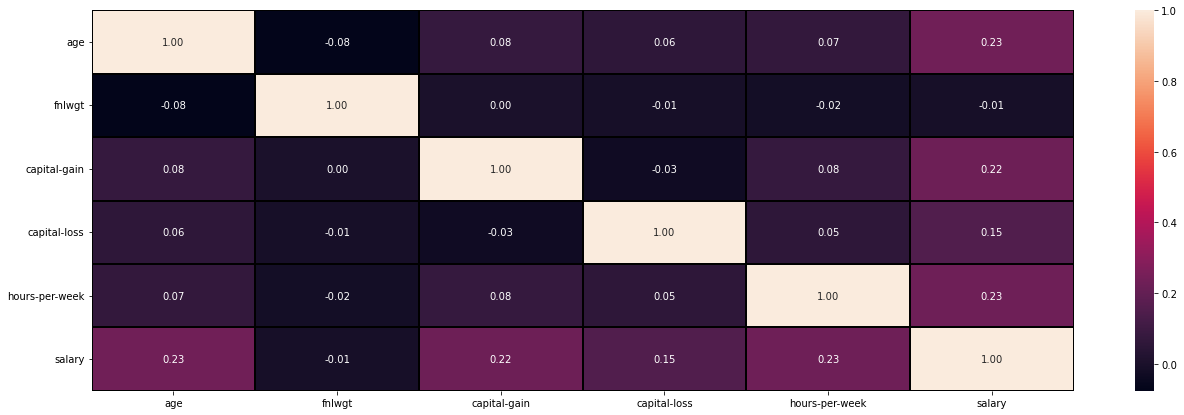

In [ ]:
plt.figure(figsize=(22,7)) # ploting the heat map
sns.heatmap(continuous_columns.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

In [ ]:
from sklearn. feature_selection import SelectKBest, f_classif

In [ ]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, categorical_col):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in categorical_col:
        CategoryGroupLists=inpData.groupby(predictor)[TargetVariable].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [ ]:
FunctionAnova(inpData=continuous_columns, 
              TargetVariable='salary', 
              categorical_col=continuous_columns)

##### ANOVA Results ##### 

age is correlated with salary | P-Value: 0.0
fnlwgt is correlated with salary | P-Value: 1.5629979058448007e-18
capital-gain is correlated with salary | P-Value: 0.0
capital-loss is correlated with salary | P-Value: 0.0
hours-per-week is correlated with salary | P-Value: 0.0
salary is correlated with salary | P-Value: 0.0


['age', 'fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week', 'salary']

# Visual Distribution for continuous predictors
- displot --> skewness
- box plot --> outlires 

# 1 age

<AxesSubplot:xlabel='age', ylabel='Density'>

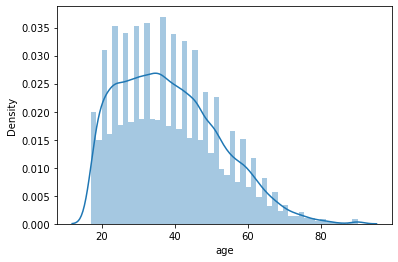

In [ ]:

sns.distplot(continuous_columns['age'])

<AxesSubplot:xlabel='age'>

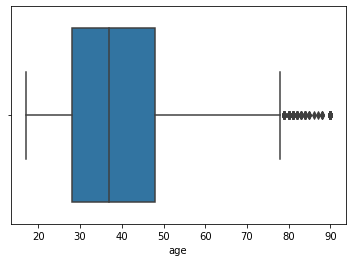

In [ ]:
sns.boxplot(continuous_columns['age'])

# 2 fnlwgt 

<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

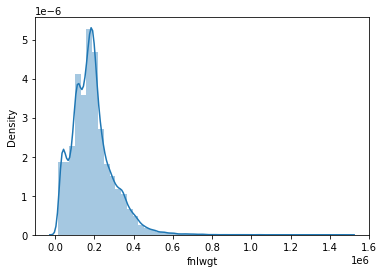

In [ ]:
sns.distplot(continuous_columns['fnlwgt'])

<AxesSubplot:xlabel='fnlwgt'>

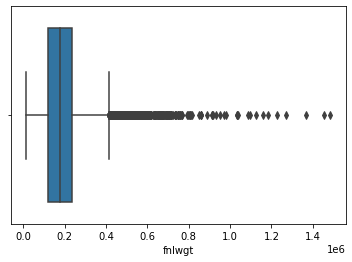

In [ ]:
sns.boxplot(continuous_columns['fnlwgt'])

# 3  capital-gain

<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

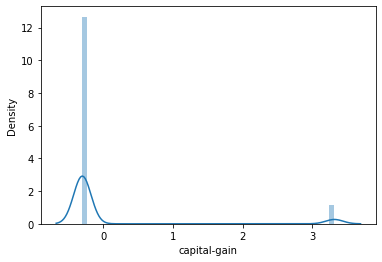

In [ ]:
sns.distplot(continuous_columns['capital-gain'])

<AxesSubplot:xlabel='capital-gain'>

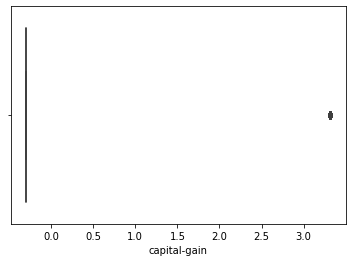

In [ ]:
sns.boxplot(continuous_columns['capital-gain'])

# 4 capital-loss

<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

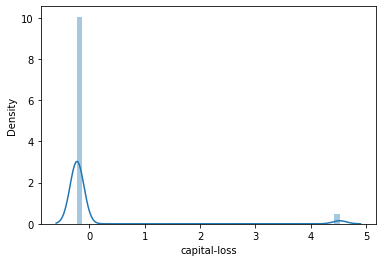

In [ ]:
sns.distplot(continuous_columns['capital-loss'])

<AxesSubplot:xlabel='capital-loss'>

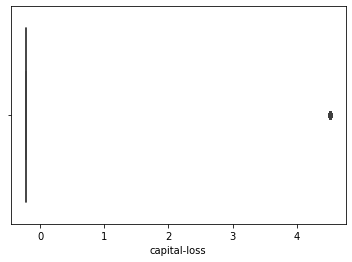

In [ ]:
sns.boxplot(continuous_columns['capital-loss'])

# 5 hours-per-week

<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

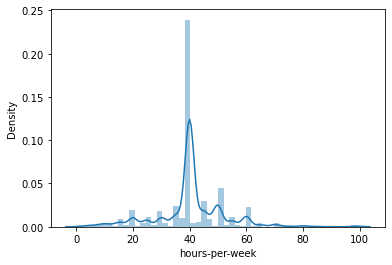

In [ ]:
sns.distplot(continuous_columns['hours-per-week'])

<AxesSubplot:xlabel='hours-per-week'>

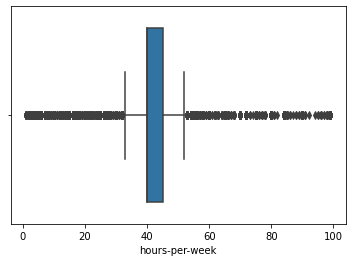

In [ ]:
sns.boxplot(continuous_columns['hours-per-week'])

# skewness treatment 
### for the below columns 
1) age  ---> PowerTransformer--> box-cox <br>

2) capital-gain ---> PowerTransformer-->yeo-johnson <br>   
3) capital-loss---> PowerTransformer-->  yeo-johnson<br>

# 1

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='box-cox')
continuous_columns['age'] = scaler.fit_transform(continuous_columns[['age']].values)

In [ ]:
continuous_columns[ 'age'].skew()

-0.016122155859744396

<AxesSubplot:xlabel='age'>

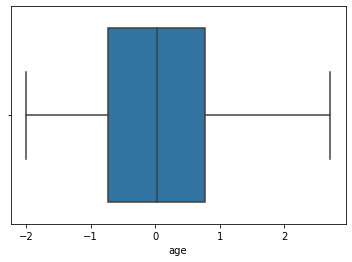

In [ ]:
sns.boxplot(continuous_columns['age']) # Final

# 2

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['capital-gain'] = scaler.fit_transform(continuous_columns[['capital-gain']].values)

In [ ]:
continuous_columns['capital-gain'].skew()

3.0162831749223002

# 3

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['capital-loss'] = scaler.fit_transform(continuous_columns[['capital-loss']].values)

In [ ]:
continuous_columns['capital-loss'].skew()

4.299587185399981

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer (method='yeo-johnson')
continuous_columns['fnlwgt'] = scaler.fit_transform(continuous_columns[['fnlwgt']].values)

In [ ]:
continuous_columns['fnlwgt'].skew()

0.016901991421126465

In [ ]:
X = continuous_columns.drop('salary', axis=1)
y = continuous_columns.salary

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Finding variance inflation factor in each scaled column i.e X_scaled.shape [1] (1/(1-R2))
vif = pd.DataFrame()
vif["vif"]= [variance_inflation_factor (continuous_columns, i) for i in range (continuous_columns.shape[1])]
vif["Features"] = continuous_columns. columns
#vif must be done after scaling the data 
#Let's check the values

In [ ]:
vif

,vif,Features
0,1.075574,age
1,1.005114,fnlwgt
2,1.074315,capital-gain
3,1.026838,capital-loss
4,1.051184,hours-per-week
5,1.155016,salary


# Select the best predictors  Using SelectKBest technique

In [ ]:
best_features = SelectKBest(score_func=f_classif, k=4) # k means how many feature we want to select from  out off
fit= best_features.fit (X,y)

df_scores = pd.DataFrame (fit.scores_)
df_columns= pd.DataFrame (X.columns)
#concatenate dataframes
feature_scores = pd.concat([df_columns, df_scores], axis=1)
feature_scores.columns = ['Feature_Name', 'Score'] # name output columns

print (feature_scores.nlargest (4, 'Score')) # print 17 best features

     Feature_Name        Score
2    capital-gain  2482.512830
0             age  2441.170993
4  hours-per-week  1813.350200
3    capital-loss   638.575003


In [ ]:
continuous_columns.drop(columns=['fnlwgt'],axis=1,inplace=True)

# Selecting final predictors for Machine Learning model

In [ ]:
SelectedColumns=[df_dummies.columns,continuous_columns.columns]

In [ ]:
SelectedColumns

[Index(['workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
        'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
        'workclass_ State-gov', 'workclass_ Without-pay',
        'education_ Doctorate', 'education_ HS-grad', 'education_ Masters',
        'education_Associate', 'education_College', 'education_school',
        'marital-status_ Married-AF-spouse',
        'marital-status_ Married-civ-spouse',
        'marital-status_ Married-spouse-absent',
        'marital-status_ Never-married', 'marital-status_ Separated',
        'marital-status_ Widowed', 'occupation_ Armed-Forces',
        'occupation_ Craft-repair', 'occupation_ Exec-managerial',
        'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners',
        'occupation_ Machine-op-inspct', 'occupation_ Other-service',
        'occupation_ Priv-house-serv', 'occupation_ Prof-specialty',
        'occupation_ Protective-serv', 'occupation_ Sales',
        'occupation_ Tech-support', 

In [ ]:
# Concatenation
features_for_ml= dfcat2 = pd.concat([continuous_columns,df_dummies],axis=1)

In [ ]:
x = features_for_ml.drop (columns = ['salary'])
y = features_for_ml[ 'salary']

# Using SMOTE to balance the data set 

In [ ]:
from imblearn.over_sampling import SMOTE


print(x.shape,y.shape)
oversample = SMOTE()
f, l = oversample.fit_resample(x, y)
print(f.shape,l.shape)

(32561, 88) (32561,)
(49440, 88) (49440,)


<AxesSubplot:xlabel='salary', ylabel='count'>

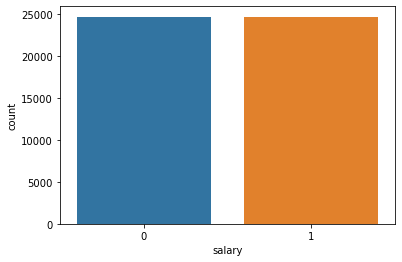

In [ ]:
sns.countplot(x=l)

In [ ]:
log_reg = LogisticRegression ()

In [ ]:
maxacc=0
maxrn

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    log_reg.fit(x_train,y_train)
    pred=log_reg.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8425026968716289 Random state:- 51


In [ ]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 51)

In [ ]:
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
#Model Accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8418284789644013

In [ ]:
# Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[5008, 1174],
       [ 781, 5397]], dtype=int64)

In [ ]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      6182
           1       0.82      0.87      0.85      6178

    accuracy                           0.84     12360
   macro avg       0.84      0.84      0.84     12360
weighted avg       0.84      0.84      0.84     12360



In [ ]:
# ROC Curve
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve (y_test, y_pred)

In [ ]:
# thresholds [0] means no instances predicted (It should be read from 0-max)
print ('Threshold =', thresholds)
print ('True Positive rate = ',tpr)
print ('False Positive rate = ',fpr)

Threshold = [2 1 0]
True Positive rate =  [0.         0.87358368 1.        ]
False Positive rate =  [0.         0.18990618 1.        ]


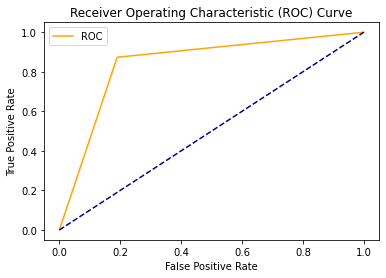

In [ ]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--' )
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [ ]:
# How much area it is covering (AUC)

auc_score = roc_auc_score (y_test,y_pred)
print (auc_score)

0.8418387524050598


In [ ]:
knn=KNeighborsClassifier()
maxacc=0
maxrn=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=.30,random_state=i)
    knn.fit(x_train,y_train)
    pred=knn.predict(x_test)
    score=accuracy_score(pred,y_test)
    if score>maxacc:
        maxacc=score
        maxrn=i
print('accuracy_score:-',maxacc,'Random state:-',maxrn)

accuracy_score:- 0.8520091693635383 Random state:- 46


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(f,l,test_size=0.3,random_state=46)

In [ ]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('accuracy score through logistic regression is ')
print(round((accuracy_score(y_test,pred)),3))
print('classification report is')
print(classification_report(y_test,pred))
print('confusion matrix is')
print(confusion_matrix(y_test,pred))
print('\n')

accuracy score through logistic regression is 
0.852
classification report is
              precision    recall  f1-score   support

           0       0.91      0.78      0.84      7392
           1       0.81      0.92      0.86      7440

    accuracy                           0.85     14832
   macro avg       0.86      0.85      0.85     14832
weighted avg       0.86      0.85      0.85     14832

confusion matrix is
[[5802 1590]
 [ 605 6835]]




In [ ]:
cross_val_score (knn, f, l, cv=5)

array([0.82898463, 0.84142395, 0.85264968, 0.86043689, 0.85851537])

In [ ]:
cross_val_score (knn, f, l, cv=5).mean()

0.8484021035598704

# Lets use Ensemble approch
####  Bagging and boosting

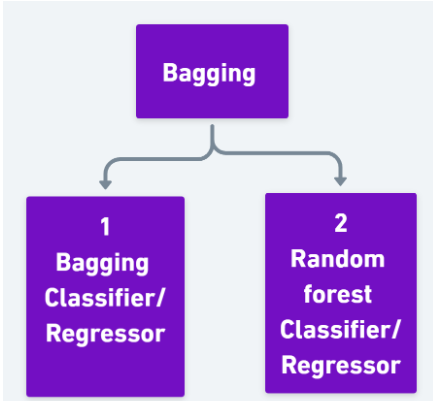

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_knn = BaggingClassifier(
                             KNeighborsClassifier (n_neighbors=5), # value of k = 5 
                             n_estimators=9, max_samples=0.7, # n_estimators means 9 model you have build 
                             bootstrap=True, random_state=3, oob_score=True
                            )

In [ ]:
bag_knn.fit (x_train, y_train)
bag_knn.score (x_test, y_test)

0.8457389428263214

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Write one function and call as many as times to check accuracy_score of different models
def metric_score (clf, x_train,x_test,y_train,y_test, train=True):
    if train:
        y_pred = clf.predict (x_train)
        print("\n================Train Result=====")
        print (f"Accuracy Score: {accuracy_score(y_train, y_pred) * 100:.2f}%")
    elif train==False:
        pred = clf.predict(x_test)
        print("\n=================Test Result================")
        print (f"Accuracy Score: {accuracy_score(y_test, pred)* 100:.2f}%")
        print ('\n \n Test Classification Report \n', classification_report(y_test, pred, digits=2)) ## Model confidence/accuracy

In [ ]:
# Initiate Decision Tree Classifier with new parameters and train
random_clf = RandomForestClassifier()
# Train the model
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
# Call the function and pass dataset to check train and test score
metric_score (random_clf,x_train, x_test, y_train,y_test, train=True) # This is for training socre
 # This is for testing score
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


================Train Result=====
Accuracy Score: 98.42%

=================Test Result================
Accuracy Score: 87.94%

 
 Test Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88      7392
           1       0.87      0.89      0.88      7440

    accuracy                           0.88     14832
   macro avg       0.88      0.88      0.88     14832
weighted avg       0.88      0.88      0.88     14832



 <font face = "Verdana" size = "3">
<b>Within the boosting we have few algorithms we are going to work on that</b><br>
           <font face = "Verdana" size = "3"><mark>1) Adaptive boosting 2) Gradient boosting3)XGB

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
ada=AdaBoostRegressor()

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(f , l, test_size= 0.25, random_state = 51)

In [ ]:
ada. fit (x_train,y_train)

AdaBoostRegressor()

In [ ]:
ada.fit (x_train, y_train)
ada.score (x_test, y_test)

0.4321108813805845

In [ ]:
#graident boosting classifier
from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingRegressor If we have regression problem 
from sklearn.metrics import classification_report , accuracy_score

In [ ]:
XX_train,XX_test,y_train,y_test=train_test_split(f , l, test_size= 0.25, random_state = 51)

In [ ]:
def mertric_Score (clf,XX_train,XX_test,y_train,y_test,train= True):
    if train:
        y_pred=clf.predict(XX_train)
        print('=== Training Score ===')
        print(f"Accuracy score : {accuracy_score(y_train,y_pred)*100 : 2f} %")
        
    elif train==False:
        pred = clf.predict(XX_test)
        print('=== Testing Score ===')
        print(f"Accuracy Score : {accuracy_score(y_test,pred)*100 : 2f}%")
        
        print ('\n \n Classification Report \n' , classification_report(y_test,pred,digits=2))

In [ ]:
# initiate GradientBoostingClassifier
gbdt_clf = GradientBoostingClassifier()
gbdt_clf.fit(XX_train , y_train)

GradientBoostingClassifier()

In [ ]:
# call the function
mertric_Score(gbdt_clf,XX_train,XX_test,y_train,y_test,train=True)
mertric_Score(gbdt_clf,XX_train,XX_test,y_train,y_test,train=False)

=== Training Score ===
Accuracy score :  85.304746 %
=== Testing Score ===
Accuracy Score :  84.635922%

 
 Classification Report 
               precision    recall  f1-score   support

           0       0.88      0.80      0.84      6182
           1       0.82      0.89      0.85      6178

    accuracy                           0.85     12360
   macro avg       0.85      0.85      0.85     12360
weighted avg       0.85      0.85      0.85     12360



In [ ]:
cross_val_score (gbdt_clf, f, l, cv=5)

array([0.82504045, 0.83990696, 0.85214401, 0.85871764, 0.8638754 ])

In [ ]:
cross_val_score (gbdt_clf, f, l, cv=5).mean()

0.8479368932038834

# You can save the model and later you can use it for prediction

In [ ]:
import pickle

In [ ]:
# saving the model to the local file system
pickle.dump (gbdt_clf, open('gbdt_clf_i_p', 'wb'))

In [ ]:
a=x_train.iloc[0]

In [ ]:
ab=pd.DataFrame(a)

In [ ]:
ab

,40018
age,-0.259391
capital-gain,-0.301425
capital-loss,-0.221210
hours-per-week,4.745146
workclass_ Local-gov,0.000000
...,...
country_ Trinadad&Tobago,0.000000
country_ United-States,1.000000
country_ Vietnam,0.000000
country_ Yugoslavia,0.000000


In [ ]:

for i in ab[40018]:
    print(i)

-0.2593909632035156
-0.30142547100632877
-0.22120963524525747
4.745146235780529
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
